# MScFE 610 Econometrics (C22-S1) - Collaborative Review Task M1

## Introduction

To apply Capital Asset Pricing Model (CAPM) for this task, I consider:
* Aamzon stock as the asset
* Broad market index (S&P 500) as the benchmark
* Ten-year US treausury yield as the risk-free rate

And, I pull the related data from the "Yahoo Finance" website:
https://finance.yahoo.com

I will then construct a dataframe using the pulled data, do some data exploration and prepare the data to answer the questions.

## Importing required libraries

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams 
import yfinance as yf
import handcalcs.render


In [104]:
%matplotlib inline
rcParams['figure.figsize'] = 20,10 

## Pulling data

The symbols for the Amazon stock, S&P 500 index and ten-year treasury yield are: AMZN, ^GSPC and ^TNX, respectively. For each a year data with daily interval is pulled.

In [105]:
AMZN = yf.download('AMZN', period = '1y', interval = '1d', rounding = True)
SnP500 = yf.download('^GSPC',period = '1y', interval = '1d', rounding = True)
TNX = yf.download('^TNX', period = '1y', interval = '1d', rounding = True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## Sample of pulled data

In [106]:
AMZN.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-22,3067.85,3126.58,3060.05,3110.87,3110.87,2902200
2021-03-23,3127.00,3182.00,3120.85,3137.50,3137.50,3817300
2021-03-24,3151.04,3160.31,3085.15,3087.07,3087.07,2959000
2021-03-25,3072.99,3109.78,3037.14,3046.26,3046.26,3563500
2021-03-26,3044.06,3056.66,2996.00,3052.03,3052.03,3312900


For this study, the "adjusted close" values are considered. A consolidated data frame is constructed using the adjusted close values of all three time-series:

In [107]:
AMZN_AdjClose = AMZN['Adj Close']
SnP500_AdjClose = SnP500['Adj Close']
TNX_AdjClose = TNX['Adj Close']

Data = pd.DataFrame({'AMZN': AMZN_AdjClose, 'S&P 500': SnP500_AdjClose, 'US Treasury Yield 10 Years': TNX_AdjClose})
Data.head()

,AMZN,S&P 500,US Treasury Yield 10 Years
Date,,,
2021-03-22,3110.87,3940.59,1.684
2021-03-23,3137.50,3910.52,1.638
2021-03-24,3087.07,3889.14,1.614
2021-03-25,3046.26,3909.52,1.614
2021-03-26,3052.03,3974.54,1.660


Please note that the dates have been considered as the index in constructing the dataframe. With this, we can make sure daily values match among all three sets of data used. 

## Exploring data

The data size i.e. number of days considered:

In [108]:
print(f"The data size : {Data.shape[0]}")

The data size : 253


In [109]:
print("Missing values :")
Data.isnull().sum()

Missing values :


AMZN                          0
S&P 500                       0
US Treasury Yield 10 Years    0
dtype: int64

There may be very few missing values for which I drop the corresponding rows of data:

In [110]:
Data = Data.dropna()

## Visualizing Data

A visualization of the price actions of the stock and benchmark as well as associated risk-free rate:

<Figure size 1440x720 with 0 Axes>

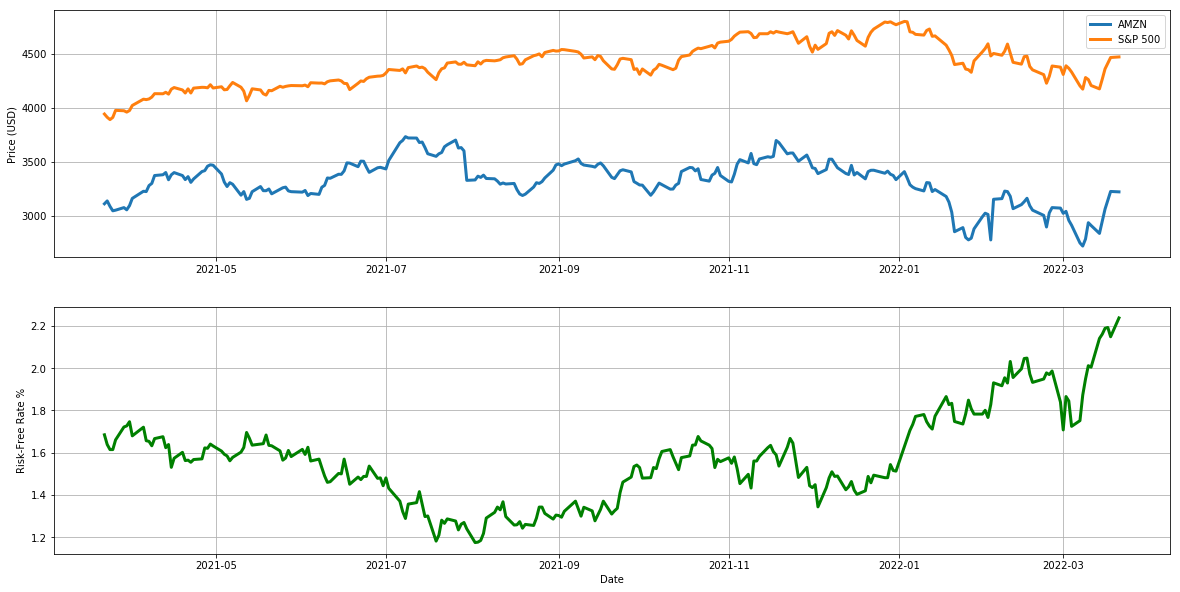

In [111]:
fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(2,1)

ax1.plot(Data[['AMZN','S&P 500']], lw = 3)
ax1.legend(Data[['AMZN','S&P 500']].columns,loc = 'best')
ax1.set_ylabel('Price (USD)')
ax1.grid()
ax2.plot(Data['US Treasury Yield 10 Years'], color = 'green', lw = 3)
ax2.set_xlabel('Date')
ax2.set_ylabel('Risk-Free Rate %')
ax2.grid()


A copy of the Data is saved for reference:

In [112]:
Data.to_csv('Data.csv')

## Questions

## 1. Write the CAPM the equation, specifying what each term means.          

The Capital Asset Pricing Model (CAPM) model states that at any point of time $ t $:

$$ R_t - R_f = \alpha + \beta (R_{mt} - R_f) + \epsilon_t $$

where:
* $ R_t $ : asset return
* $ R_f $ : risk-free return
* $ R_{mt} $ : benchmark return
* $ \alpha $ : the intercept of the linear relation showing the over/under-performance of the asset with respect to the benchmark
* $ \beta $ : the coefficient of the linear relation showing how volatile is the asset with respect to the benchmark
* $ \epsilon_t $ : the residual of the relation which is supposed to be stationary i.e. a zero-mean random variable

If we sum up the return to obtain the total returns over a time span, we will have:

$$ R - \bar{R}_f = \alpha + \beta (R_m - \bar{R}_f) $$

where:
* $ R $ : total asset return
* $ \bar{R}_f $ : effective risk-free return over the time period
* $ R_m $ : total benchmark return

This is because the asset and benchmark returns are "time consistent" and the residual is a zero-mean variable which will cancel out. 

## 2. Explain in words how the model explains the return of a stock.  

In simple words, CAPM states that in the long-run the return of a stock is proportional with the return of the broader market index - which is a weighted average of all stocks including the stock under study. However, the investment in an individual stock could be riskier (or less riskier) i.e. the price can swing more (or less) depending on the $ \beta $ of the stock. One could then evaluate whether accepting the risk has lead to over-performance with respect to the market or not by looking at the $ \alpha $ over a period of investment.
From this explanation, if:
* |$ \beta $|>1: the asset is more volatile than the index.
* |$ \beta $|<1: the asset is less volatile than the index.
* $ \beta $>0: the asset is correlated with the index.
* $ \beta $<0: the asset is negatively correlated with the index - and can be used as a hedge.
* $ \alpha $>0: the asset has over-performed the market index.
* $ \alpha $<0: the asset has under-performed the market index.

 
## 3. Choose a stock.  Download 1 year worth of data of the adjusted closing price.          

In [113]:
Data[['AMZN']]

,AMZN
Date,
2021-03-22,3110.87
2021-03-23,3137.50
2021-03-24,3087.07
2021-03-25,3046.26
2021-03-26,3052.03
...,...
2022-03-15,2947.33
2022-03-16,3062.08
2022-03-17,3144.78


 
## 4. Compute the return from this series.          

The returns can be calculated by differencing the logarithmic values of data points. And, we multiply the values by 100 to get the returns as percentage:

In [114]:
Data['AMZN_lr'] = 100 * np.log(Data['AMZN']).diff()
Data[['AMZN_lr']].head()

,AMZN_lr
Date,
2021-03-22,NaN
2021-03-23,0.852387
2021-03-24,-1.620388
2021-03-25,-1.330781
2021-03-26,0.189233


Please note that the value of first row becomes NaN as a result of diffrencing because there is no perivious data point to give the difference for the first row. This, however, will not cause a problem as it is automatically not considered for the summation to obtain the total percentage return:

In [115]:
%%render
R = Data['AMZN_lr'].sum()

<IPython.core.display.Latex object>

 
## 5. Find the stock’s beta from a financial website.          

The beta of the Amazon stock can be obtained from Yahoo Finance <a href="https://ca.finance.yahoo.com/quote/AMZN/key-statistics?p=AMZN">Statistics</a> of the stock:

In [116]:
%%render
beta = 1.11

<IPython.core.display.Latex object>

## 6. Choose a benchmark, say the SP500.  Download 1 year worth of data of the adjusted closing price.  Make sure the time period matches for the benchmark and the stock.          

In [117]:
Data[['S&P 500']]

,S&P 500
Date,
2021-03-22,3940.59
2021-03-23,3910.52
2021-03-24,3889.14
2021-03-25,3909.52
2021-03-26,3974.54
...,...
2022-03-15,4262.45
2022-03-16,4357.86
2022-03-17,4411.67


Same time period and dates have been considered when we pulled the data (please refer to the section "pulling data")

## 7. Compute the return of this benchmark.          

The returns can be calculated by differencing the logarithmic values of data points. And, we multiply the values by 100 to get the returns as percentage:

In [118]:
Data['S&P 500_lr'] = 100 * np.log(Data['S&P 500']).diff()
Data[['S&P 500_lr']]

,S&P 500_lr
Date,
2021-03-22,NaN
2021-03-23,-0.766010
2021-03-24,-0.548230
2021-03-25,0.522655
2021-03-26,1.649441
...,...
2022-03-15,2.118255
2022-03-16,2.213700
2022-03-17,1.227219


Please note that the value of first row becomes NaN as a result of diffrencing because there is no perivious data point to give the difference for the first row. This, however, will not cause a problem as it is automatically not considered for the summation to obtain the total percentage return:

In [119]:
%%render
R_m = Data['S&P 500_lr'].sum()

<IPython.core.display.Latex object>

## 8. Formulate the CAPM using your stock’s return, the benchmark return, and a risk-free rate.       

We consider the mean of the ten-year rate as the effective rate over the one year of our study: 

In [123]:
%%render
R_f = Data['US Treasury Yield 10 Years'].mean()

<IPython.core.display.Latex object>

From the CAPM total return formula obtained in question 1, we can calculate the $ \alpha $ in percentage as:

In [126]:
%%render
alpha = (R - R_f) - beta * (R_m - R_f) 

<IPython.core.display.Latex object>

This our asset (Amazon stock) has underperformed the broad market index about 10% over the past year.